# LQR Control
In this homework assignment, your objective is to write a controller for a Cart-Pendulum robotic system. (see below)

<img src="./cart_pendulum.png" width="400">

This system is considered a classical control problem. While the dimensionality of the system is pretty small $x\in\mathbb{R}^4$, $u \in \mathbb{R}^1$, the dynamics are quite nonlinear and pose interesting issues for writing controller. One such issue is that it is underactuated and therefore, we can not use our traditional controllers. Another is that the dynamics have a kinematic singularity where any control input will not have an effect on the pendulum during swing up. 


The task is to write a balance and swing up controller using two methods: 1) LQR and 2) Direct Transcription using a model of the cart-pendulum. 

In [1]:
# Imports 
import jax
import jax.numpy as jnp 
from jax import jacfwd, grad
import numpy as np
import matplotlib.pyplot as plt
from viewer import CartPendulumViewer
import time


<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


### Dynamics and derivatives
We are first going to explicitly write down the continuous time dynamics $\dot{x} = f(x,u)$ for the cart pendulum.
$$
    \dot{x} = f(x,u) = \begin{bmatrix}
        \dot{\theta} \\ 
        \dot{x}_c \\ 
        \frac{g}{l} \sin(\theta) + \frac{u}{l} \cos(\theta) \\ 
        u
    \end{bmatrix}
$$
where $\theta, x_c$ are the pendulum angle (0 is inverted equilibrium) and the cart position respectively, and $g,l$ is gravity and the pendulum length. 

To compute an LQR controller we need to compute the derivatives $A=\frac{\partial f}{\partial x}$, and $B=\frac{\partial f}{\partial u}$ about the inverted equilibrium $\bar{x} = [0,0,0,0], \bar{u} = [0]$ where the dynamics are locally
$$
    \dot{x} = Ax + Bu
$$
Note that this is the **continuous** time $A$ and $B$ matrices for the linearized dynamics. To compute an LQR controller for a robot, we would need to use the **discrete** time dynamics. To obtain this, we simply assume Euler integration for a discrete time $\Delta t$: 
$$
    \begin{align*}
        x_{t+1} &= x_t + \dot{x} \Delta t \\
                &= x_t + (Ax_t + Bu_t) \Delta t  \\ 
                &= (I+A\Delta t) x_t + \Delta t B u_t  \\ 
                &=\bar{A} x_t + \bar{B} u_t 
    \end{align*}
$$
we will use the discrete time $\bar{A},\bar{B}$ to compute the LQR controller. 

Using `jacfwd` compute the $\bar{A}, \bar{B}$ matrices around the operating points $\bar{x}, \bar{u}$.

In [1]:
## This is your operating state and control
xbar = jnp.zeros(4)
ubar = jnp.zeros(1)
Dt = 0.1

def f(x, u):
    """
        Comtinuous time dynamics \xdot{x} = f(x, u)
    """
    _g = 9.81 
    _l = 1.0
    th, xc, thdot, xcdot = x
    F = u[0]
    xdot = jnp.array([
                thdot, xcdot,
                _g*jnp.sin(th)/_l+F*jnp.cos(th)/_l,
                F])
    return xdot

A = ???
B = ???

SyntaxError: invalid syntax (4200620105.py, line 17)

### LQR Algorithm 
Construct the quadratic cost function for this problem. Compose the LQR algorithm for calculating the LQR controller and the Ricatti matrix for time discrete time horizon $T$. 

The cost is given as 
$$
    \ell(x, u) = x^\top Q x + u^\top R u
$$
with 
$$
    m(x) = x^\top Q_f x
$$

Pick a $Q, R, Q_f$ and construct a function that outputs the LQR controller gains $K_t$ for $u = K_t x_t$ for $t \in [0, \ldots, T-1]$ and the Ricatti matrix $P_t \forall t \in [0, \ldots, T-1]$


In [3]:
tf = 10
T = int(tf/Dt)

Q  = ???
Qf = ???
R  = ???

def getLQRGains(A, B, Q, R, Qf, T):
    """
        Return a list of K and P for time t -> 0, T-1
        Klist = [K0, K1, K2,...]
        Plist = [P0, P1, P2,...]
    """

    return Klist, Plist

### Simulate Balance Control
Bring it all together! Write a simulation which uses the cart pendulum continuous time dynamics and simulate the dynamics while balancing the robot. Go and use your function to compute an LQR controller to create a balance controller for the simulation time. 

In [5]:
viewer = CartPendulumViewer()
viewer.open()

x0 = np.array([0.6, 0.4, 0., 0.])
trajectory ={
    'x' : [],
    'u' : []
}

K, P = getLQRGains(A, B, Q, R, Qf, T)

for t in range(T):
    """
        Add code here to simulate cart pendulum and 
        calculate the feedback control u = K x
        use your euler/rk4 code from last assignment to integrate
        continuous-time dynamics f(x,u)
    """

    trajectory['x'].append(x0.copy())
    trajectory['u'].append(u.copy())
    viewer.render(x0[:2])
    time.sleep(Dt)

KeyboardInterrupt: 

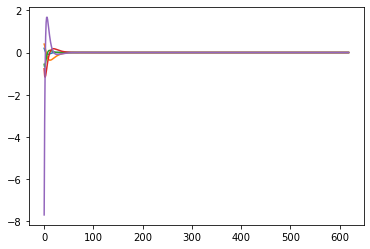

In [ ]:
plt.plot(trajectory['x'])
plt.plot(trajectory['u'])